In [1]:
import matplotlib.pyplot as plt
import numpy as np
import spb
from probability_functions import (
    birthday_probability,
    multinomial_coefficient,
    print_aligned_latex_equations,
    sample_with_fixed_defects,
    exponential_distribution_cdf
)
from sympy import S
import sympy as sp
from sympy.stats import Bernoulli, E, density, variance
import scipy.special as sps
from scipy.stats import norm

## 5 - The birthday problem 

The birthday problem in probability is a classic question that explores 
the likelihood of at least two people sharing the same birthday in a group. 
Although it might seem that a large group would be needed for shared birthdays, 
the probabilities are surprisingly high even with relatively small groups.

__Problem Statement__
Given a group of $n$ people, what is the probability that at least two of 
them share the same birthday?

__Assumptions__
There are 365 possible birthdays, ignoring leap years.
Each person's birthday is equally likely to be any day of the year (i.e., birthdays are uniformly distributed).

In [2]:
text = [
    r" &\textrm{Group size of 23 has more than 50\% chance }"
    r" \textrm{of a repeated birthday.}",
    r" &\textrm{Actual probability of 23 people }"
    r" \textrm{with same birthday is }"
    rf"{round(birthday_probability(23)*100,2)}\%",
]

print_aligned_latex_equations(*text)

<IPython.core.display.Math object>

## 6 - Quality Control Non Destructive Inspection

<img src="./images/vid06-Quality-Control.jpg" alt="alt text" width="40%">
<img src="./images/vid06-Quality-Control-01.jpg" alt="alt text" width="40%">

In [3]:
sample_with_fixed_defects(20, 5, 10, 3)

## 7 Binomial Distribution and the Multinomial Distribution



### Multinomial Coefficient

##### Multinomial Coefficient: Definition
The **multinomial coefficient** is a generalization of the binomial coefficient. 
While the binomial coefficient counts the number of ways to divide $ n $ 
objects into two groups, the multinomial coefficient counts the number of ways 
to divide $ n $ objects into $ k $ groups of specified sizes.

It is used when an experiment or scenario involves splitting items into multiple 
categories or groups, where the order within each group does not matter but 
the size of each group is important.

#### Mathematical Representation

For a non-negative integer $ n $ and a partition of $ n $ into $ k $ 
non-negative integers $ n_1, n_2, \ldots, n_k $ such that:
$$
n_1 + n_2 + \ldots + n_k = n
$$
the **multinomial coefficient** is given by:
$$
\binom{n}{n_1, n_2, \ldots, n_k} 
   = \frac{n!}{n_1! \times n_2! \times \cdots \times n_k!}
$$

#### How It Works

- $ n! $: The total number of ways to arrange $ n $ objects.
- $ n_1!, n_2!, \ldots, n_k! $: The number of ways to arrange each 
- subgroup of objects, which must be divided out because the order within 
- each subgroup does not matter.

#### Example
Suppose you have 5 objects and want to divide them into three groups of 
sizes 2, 2, and 1. The multinomial coefficient is:
$$
\binom{5}{2, 2, 1} 
   = \frac{5!}{2! \times 2! \times 1!} 
   = \frac{120}{2 \times 2 \times 1} = 30
$$

This tells us there are 30 ways to divide 5 objects into groups of 
sizes 2, 2, and 1.

#### Use Cases of Multinomial Coefficients
1. **Counting Arrangements**: Multinomial coefficients are used in problems 
   where a set of objects must be distributed among multiple categories. 
   For example, in probability theory, they are used to calculate the 
   number of ways to distribute items or outcomes across different categories.

2. **Multinomial Theorem**: The multinomial coefficient appears in the 
   **multinomial theorem**, which is a generalization of the binomial theorem. 
   The multinomial theorem states:
   $$
   (x_1 + x_2 + \ldots + x_k)^n 
      = \sum \binom{n}{n_1, n_2, \ldots, n_k} x_1^{n_1} x_2^{n_2} \ldots x_k^{n_k}
   $$
   where the summation is taken over all possible sets of non-negative 
   integers $ n_1, n_2, \ldots, n_k $ that sum to $ n $.

#### Applications
1. **Probability and Statistics**: Multinomial coefficients are used in 
   problems involving 
   * the distribution of objects or 
   * events across multiple  categories, such as in multinomial 
  probability distributions.
1. **Combinatorial Problems**: Situations that involve dividing a set of 
   objects
   * multiple groups or 
   * * partitions often use multinomial coefficients.
2. **Physics and Chemistry**: They are used in
   * counting states or 
   * configurations, such as distributing particles among energy levels 
  or molecules among compartments.

#### Example in Probability

Imagine rolling a fair die 6 times and being interested in how many ways we 
can get the results: two 1s, one 2, one 3, one 4, and one 5.
Here, $ n = 6 $ and the outcome counts are 
$ n_1 = 2 , n_2 = 1 ,  n_3 = 1 ,  n_4 = 1, n_5 = 1 $. 

The multinomial coefficient gives:
$$
\binom{6}{2, 1, 1, 1, 1} 
   = \frac{6!}{2! \times 1! \times 1! \times 1! \times 1!} 
   = \frac{720}{2} = 360
$$
So, there are 360 ways to get this particular distribution of die rolls.

Here’s an example for better understanding: 

Suppose you want to distribute 10 objects into 3 bins where the first 
bin gets 4 objects, the second bin gets 3, and the third bin gets 3. 
The multinomial coefficient is calculated as:

$$ \binom{10}{4, 3, 3} = \frac{10!}{4!3!3!} = 4200 $$


#### Poker hands

How many ways of distributing poker hands to 4 players

In a standard poker game, each player receives 5 cards from a deck of 52 cards. 
To figure out how many ways you can distribute these hands to 4 players, 
you can use combinatorics. The formula will be:

$$ \frac{{52 \choose 5} 
      \times {47 \choose 5} 
      \times {42 \choose 5} 
      \times {37 \choose 5}}{4!} 
$$

This formula considers:
1. **Choosing 5 cards for Player 1** from the 52-card deck: ${52 \choose 5}$.
2. **Choosing 5 cards for Player 2** from the remaining 47 cards: ${47 \choose 5}$.
3. **Choosing 5 cards for Player 3** from the remaining 42 cards: ${42 \choose 5}$.
4. **Choosing 5 cards for Player 4** from the remaining 37 cards: ${37 \choose 5}$.
5. **Dividing by 4!** (the number of ways to arrange the 4 players) to 
account for the fact that the order in which the hands are dealt doesn't matter.

Let’s simplify it with some math:
$$ \frac{\left(\frac{52!}{5! \times 47!}\right) \times \left(\frac{47!}{5! \times 42!}\right) \times \left(\frac{42!}{5! \times 37!}\right) \times \left(\frac{37!}{5! \times 32!}\right)}{24} $$

This expression is quite large, but modern calculators or software can 
compute it efficiently. 

In SymPy, you can express a multinomial coefficient using the multinomial function. The multinomial coefficient is a generalization of the binomial coefficient and is used in the context of dividing 
$n$ items into several groups of given sizes.

In [4]:
# Example: Multinomial coefficient for partitioning n items
# into groups of size k1, k2, ..., kr
n = 10
group_sizes = [4, 3, 3]
assert multinomial_coefficient(n, group_sizes) == 4200

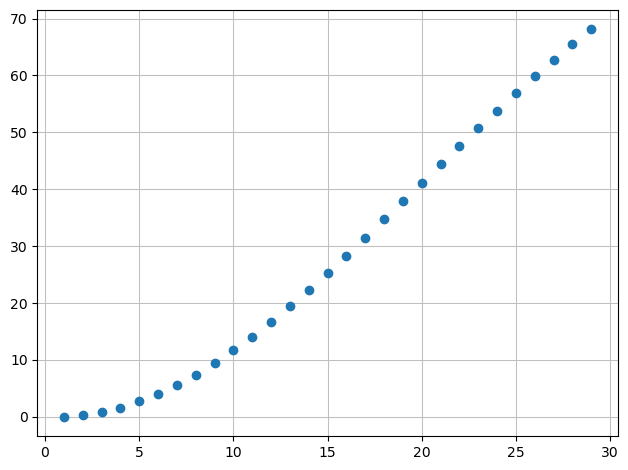

In [5]:
probabilities = [birthday_probability(n) * 100 for n in range(1, 30)]
spb.graphics(
    spb.list_2d(coord_x=range(1, 30), coord_y=probabilities, scatter=True),
    backend=spb.MB,
)

# 8 Conditional Probability

Conditional probability is the probability of an event occurring, given 
that another event has already occurred. It is denoted as $P(A|B)$,
which reads as "the probability of A given B." 

**Formula:**
The formula for conditional probability is:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

Where:

* $P(A|B)$: The probability of event A occurring given that event B has occurred.
* $P(A \cap B)$: The probability of both events A and B occurring together 
(the intersection of A and B).
* $P(B)$: The probability of event B occurring.

**Visualization:**

<img src="./images/conditional02.jpg" alt="alt text" width="40%">


In the Venn diagram:

* The circle labeled "A" represents all the possible outcomes of event A.
* The circle labeled "B" represents all the possible outcomes of event B.
* The overlapping area (shaded region) represents the outcomes where both 
A and B occur, or the intersection of A and B.

**In Summary:**
Conditional probability helps us understand how the occurrence of one 
event influences the probability of another. By using the formula and 
visualizing with Venn diagrams, we can calculate and interpret conditional 
probabilities in various scenarios.

## Cancer probability
<img src="./images/CancerProb01.jpg" alt="alt text" width="40%">

Design a new test to detect cancer using 1000 subjects 500 who have 
cancer and 500 who do not.

| Cancer Subjects    | Positive + | Negative - |
|--------------------|------------|------------|
| 500 with cancer    | 450        | 50         |
| 500 without cancer | 100        | 400        |

```mermaid
graph TD;
    A[Cancer Trial]-->B[500 with Cancer];
    B-->|Test +|B1[450]
    B-->|Test -|B2[50]
    A-->C[500 without cancer];
    C-->|Test +|A1[100]
    C-->|Test -|A2[400]
```

In [6]:
print(
    "Probability of a positive test cancer round(550/1000*100, 2) =",
    round(550 / 1000 * 100, 2),
)

Probability of a positive test cancer round(550/1000*100, 2) = 55.0


# 9 Law of Total Probability

$\Omega$ is sample space and 
\begin{align*} 
    \Omega &= \left ( \bigcup_{i \in \{1..n\}} B_i \right ) \land  \left (\forall i,j \in \{1..n\} \; i \ne j \implies B_i \cap B_j = \emptyset \right ) \\ &\implies \\
    P(A) &= \sum_{i \in \{1..n\}} P(A \mid B_i ) P(B_i) 
\end{align*}


# 10 Bayes Theorem 

Bayes' theorem can be expressed as:

$$P(A|B) = \frac{P(B|A) P(A)} {P(B)}$$

In this equation:

* The numerator $P(B|A) P(A)$ represents the joint probability of both 
$A$ and $B$ occurring.
* The denominator $P(B)$ is the marginal probability of B, which acts 
as a normalization factor.

By using Bayes' theorem, we can update our beliefs about the probability 
of an event $A$ as we gather more evidence $B$.

Here are the names of the component probabilities in Bayes' theorem:

* **Prior probability $P(A)$**: This is the initial belief or estimate 
of the probability of event $A$ occurring before any new evidence is considered.
* **Posterior probability $P(A|B)$**: This is the updated probability of event 
$A$ occurring after considering new evidence $B$.It's the probability of $A$  
given that B has occurred.
* **Likelihood $P(B|A)$**: This is the probability of observing evidence  
  $B$ given that event A is true. It measures how likely the observed evidence 
  is if the hypothesis $A$ is correct.
* **Marginal probability $P(B)$**: This is the probability of observing  
evidence $B$ regardless of whether event $A$ is true or false.  
It's the overall probability of the evidence.

![](./images/bayes_theorem.jpg)


## Example Cancer Test 1

**Problem Setup:**

* We have a cancer test that is 99% accurate.
* The disease is very rare, with a prevalence of 0.001 (1 in 1000).

**Variables:**

* **A:** Event of testing positive
* **B:** Event of having the disease

**Given Probabilities:**

* **$P(A|B) = 0.99$:** Probability of testing positive given you have the disease (sensitivity)
* **$P(A| \sim B) = 0.01$:** Probability of testing positive given you don't have the disease (false positive rate)
* **$P(B) = 0.001$:** Probability of having the disease (prevalence)

**Goal:**

Calculate the probability of actually having the disease given a positive test result, i.e., $P(B|A)$.

**Solution using Bayes' Theorem:**

$$P(B|A) = \frac{P(A|B) P(B)} {P(A)}$$

**Calculating $P(A)$:**
\begin{align*} 
     P(A) &= P(A|B) \times P(B) + P(A|\sim B) \times P(\sim B) \\
          &= (0.99 \times 0.001) + (0.01 \times 0.999) \\
          &= 0.01098 \\
\end{align*}

**Calculating $P(B|A)$:**

\begin{align*} 
     P(B|A) &= \frac{0.99 \times  0.001}{0.01098} \\
            &\approx 0.09
\end{align*}

**Interpretation:**

Even though the test is 99% accurate, the probability of actually having the disease given a positive test result is only about 9%. This is because the disease is so rare that most positive results are likely false positives.

This is a classic example of how even highly accurate tests can be misleading when the disease is rare. It highlights the importance of understanding the base rate of a condition when interpreting test results.

## Example Drug Test

**Here's the text with the formulas formatted in LaTeX:**

**Problem Setup:**

* Drug test accuracy: 90%
* Prevalence of drug use: 10%

**Variables:**

* A: Event of testing positive
* B: Event of actually using drugs

**Given Probabilities:**

* $P(A|B) = 0.9$: Probability of testing positive given drug use (true positive rate)
* $P(A|\neg B) = 0.1$: Probability of testing positive given no drug use (false positive rate)
* $P(B) = 0.1$: Probability of drug use (prevalence)

**Goal:**

Calculate $P(B|A)$: Probability of drug use given a positive test result

**Solution using Bayes' Theorem:**

\begin{align*} 
     P(B|A) = \frac{P(A|B) \cdot P(B)}{P(A)}
\end{align*}


**Calculating P(A):**

\begin{align*} 
     P(A) &= P(A|B) \cdot P(B) + P(A|\neg B) \cdot P(\neg B)\\
          &= (0.9 \cdot 0.1) + (0.1 \cdot 0.9)\\
          &= 0.18\\
\end{align*}


**Calculating P(B|A):**

\begin{align*} 
     P(B|A) &= \frac{(0.9 \cdot 0.1)}{0.18} \\
            &= 0.5 \\
\end{align*}


**Interpretation:**

Even with a 90% accurate test, a positive result only indicates a 50% chance of actual drug use due to the relatively high false positive rate and low prevalence of drug use. 

## Example Drug Test 2

**Problem Setup:**

* Drug test accuracy: 
    * Sensitivity (true positive rate): 90% (P(+|use) = 0.9)
    * Specificity (true negative rate): 80% (P(-|not use) = 0.8)
* Prevalence of drug use: 10% (P(use) = 0.1)

**Variables:**

* A: Event of testing positive
* B: Event of actually using drugs

**Goal:**

Calculate $P(B|A)$: Probability of drug use given a positive test result

**Solution using Bayes' Theorem:**
\begin{align*} 
     P(B|A) = \frac{P(A|B) \cdot P(B)}{P(A)}
\end{align*}

**Calculating P(A):**

\begin{align*} 
     P(A) &= P(A|B) * P(B) + P(A|¬B) * P(¬B) \\
          &= (0.9 * 0.1) + (0.1 * 0.9) \\
          &= 0.18 \\
\end{align*}
**Calculating P(B|A):**

\begin{align*} 
     P(B|A) &= \frac{(0.9 * 0.1)}{0.18} \\
            &= 0.5 \\
\end{align*}

**Interpretation:**

Even with a relatively accurate test, a positive result only indicates a 50% chance of actual drug use due to the relatively high false positive rate and low prevalence of drug use. 

**Key Points:**

* **Sensitivity:** The probability that a test correctly identifies a positive case.
* **Specificity:** The probability that a test correctly identifies a negative case.
* **Prevalence:** The proportion of the population that has the condition.

**In this specific case, even though the test is relatively accurate, its predictive value is significantly reduced due to the low prevalence of drug use.**

**Remember:** Bayes' theorem allows us to update our beliefs about the probability of an event based on new evidence. In this case, the evidence is the positive test result, and we're updating our belief about the probability of actual drug use.


# 12 - Independence      
     
Certainly, let's break down the concept of independence in probability based 
on the information provided in the image.

**Independence of Events**

Two events, A and B, are considered independent if knowing the occurrence 
of one event gives no additional information about the likelihood of the 
other event occurring.

**Mathematical Conditions for Independence**

1. **Conditional Probability:**
   - If A and B are independent, then:
     ```
     P(A|B) = P(A)
     ```
   - This means the probability of A happening, given that B has already happened, 
   - is the same as the probability of A happening without any knowledge of B.

2. **Joint Probability:**
   - For independent events, the joint probability of A and B occurring together 
   - is the product of their individual probabilities:
     ```
     P(A ∩ B) = P(A) * P(B)
     ```

**Example:**

Consider a standard deck of 52 cards. Let's define two events:

- **A:** Drawing a spade
- **B:** Drawing a queen

These two events are independent. Knowing that you've drawn a queen doesn't
affect the probability of drawing a spade on the next draw.

**Calculating Probabilities:**

- **Probability of drawing a spade:**
  ```
  P(A) = 13/52 = 1/4
  ```
- **Probability of drawing a queen:**
  ```
  P(B) = 4/52 = 1/13
  ```
- **Probability of drawing a spade and a queen (independently):**
  ```
  P(A ∩ B) = P(A) * P(B) = (1/4) * (1/13) = 1/52
  ```

**Key Points:**

- Independence is a fundamental concept in probability theory.
- Understanding independence helps in calculating probabilities of complex events.
- Real-world applications of independence can be found in various fields l
- ike statistics, finance, and machine learning.

## Reliability

Certainly, let's analyze the concept of reliability in the context of the 
image you provided.

**Reliability of Systems**

Reliability is a measure of how likely a system is to function without 
failure for a specified period under stated conditions. It's a critical 
concept in engineering, particularly in fields like aerospace, automotive, 
and electronics.

**Series Systems**

In a series system, all components must function correctly for the entire 
system to work. If any one component fails, the entire system fails. 
The reliability of a series system is calculated as follows:

```
Reliability of a series system = (Reliability of component 1) * (Reliability of component 2) * ... * (Reliability of component n)
```

**Parallel Systems**

In a parallel system, the system functions as long as at least one component 
is working. All components must fail for the entire system to fail. 
The reliability of a parallel system is calculated as follows:

```
Reliability of a parallel system = 1 - [(1 - Reliability of component 1) * (1 - Reliability of component 2) * ... * (1 - Reliability of component n)]
```

A system with 10 components, each with a probability of failure of 0.05. 
The reliability of the system is calculated as:

```
Reliability = (1 - 0.05)^10 = 0.6
```

This means that there is a 60% chance that the system will function without failure.

**Key Points:**

* Series systems are more prone to failure than parallel systems.
* The reliability of a system can be improved by increasing the reliability  
of individual components or by using redundancy (e.g., parallel systems).
* Reliability is a critical factor in the design and maintenance of complex systems.

* Calculating the probability of failure for a series system as `p^n`, where 
`p` is the probability of failure of a single component and `n` is the 
 number of components. This is equivalent to 1 minus the reliability of the system.
* The concept of reliability is closely related to concepts like 
Mean Time Between Failures (MTBF) and Mean Time To Repair (MTTR).



# 13 Random variables and Probability Distributions


**1. Random Variables**

* **Discrete Random Variables:** These take on a countable number of values.  
An example is the number of heads in a certain number of coin flips, 
which follows a **binomial distribution**.
* **Continuous Random Variables:** These can take on any value within a 
given range. An example is the height of Americans, which typically follows 
a **normal distribution**. The lecture shows a bell-shaped curve representing 
a normal distribution.

**2. Probability Distribution Function (PDF)**

* The PDF, denoted as P(X), is a function that describes the probability 
of a random variable taking on a specific value.
* For discrete random variables, P(X) gives the probability of the variable 
  being equal to a particular value.
* For continuous random variables, P(X) represents the probability density 
at a specific point.

**3. Example: Flipping a Coin 4 Times**

* The lecture lists the possible outcomes of flipping a coin 4 times 
  (e.g., HHHH, HHHT, etc.).
* The random variable X is defined as the number of heads obtained in these flips.
* The possible values of X are 0, 1, 2, 3, and 4.
* The lecture likely shows the probabilities associated with each of these values.

**In Summary:**

The lecture introduces the concept of random variables, distinguishes between 
discrete and continuous types, and explains the role of the 
probability distribution function. It also uses the example of coin flips to 
illustrate these concepts.

----

Let's analyze the image you've provided, which focuses on the example 
of flipping a coin 4 times.

**Key Points:**

* **Sample Space (Ω):** This represents all possible outcomes of flipping a 
  coin 4 times. It is denoted as:

   \begin{align*} 
        \Omega = 
            \{hhhh, hhht, hhth, hhtt, hthh, htht, htth, httt, 
              thhh, thht, thth, thtt, tthh, ttht, ttth, tttt\}
      \end{align*}

   where "H" represents heads and "T" represents tails.

* **Random Variable (X):** This is defined as the number of heads that
occur in the four flips. 

* **Possible Values of X:** The random variable X can take on the following  
values: 0, 1, 2, 3, or 4.

* **Probability Distribution:** The image shows the probabilities associated 
with each possible value of X:
    - P(X = 0) = 1/16 (probability of getting 0 heads)
    - P(X = 1) = 4/16 = 1/4 (probability of getting 1 head)
    - P(X = 2) = 6/16 = 3/8 (probability of getting 2 heads)
    - P(X = 3) = 4/16 = 1/4 (probability of getting 3 heads)
    - P(X = 4) = 1/16 (probability of getting 4 heads)

* **Bar Graph:** The image includes a bar graph visually representing the 
probability distribution of X. The x-axis shows the possible values of X (0 to 4), 
and the height of each bar corresponds to the probability of that value.

**Analysis:**

* The probabilities are calculated based on the binomial distribution, 
which models the number of successes (heads) in a fixed number of independent 
trials (coin flips) with a constant probability of success (1/2 for a fair coin).
* The bar graph clearly shows that getting 2 heads (X = 2) has the highest 
* probability, while getting 0 or 4 heads has the lowest probability. 

----

**1. Concise Summary of All Probabilities**

* This highlights the core function of a PDF: it provides a complete and 
efficient way to represent the probabilities associated with a random variable.
* Instead of dealing with individual probabilities for every possible value 
(which can be numerous or even infinite for continuous variables), 
the PDF provides a single function that encapsulates all the probability 
information.

**2. PDF as a Model of a Random Process**

* This emphasizes that PDFs are not just mathematical constructs; 
they serve as models for real-world random processes.
* These models can be used for various purposes:
    * **Hypothesis Testing:** Comparing observed data to the predictions 
      of a PDF model to determine if the data aligns with the model's assumptions.
    * **Parameter Estimation:** Estimating the parameters of the PDF model
      based on the observed data.

**3. Visualization and Computation**

* PDFs enable both visual and numerical analysis:
    * **Visualization:** Plotting the PDF provides a visual representation 
      of the probability distribution, making it easier to understand the 
      likelihood of different outcomes.
    * **Computation:** PDFs can be used to calculate probabilities for various 
      intervals or ranges of values. The example on the board shows the 
      calculation of P(4 ≤ X ≤ 6), which represents the probability of the 
      random variable X falling within the interval [4, 6].

**4. Building Functions on X**

* This point suggests that PDFs can be used as building blocks for more 
  complex functions and models.
* For example, you might define a new function that operates on the 
  random variable X, and then use the PDF to analyze the behaviour or properties 
  of this new function.


## Random Variable

A random variable is a function that assigns a numerical value to each possible outcome of a random experiment. In other words, it is a variable whose value depends on the outcome of a random event.

Here are some key points to remember about random variables:

* **They are often denoted by capital letters**, such as X, Y, or Z.
* **They can be classified as either discrete or continuous.**
    * **Discrete random variables** can only take on a finite number of values. Examples include the number of heads in a coin toss, the number of children in a family, and the number of defective items in a batch of products.
    * **Continuous random variables** can take on any value within a given interval. Examples include the height of a person, the weight of an object, and the time it takes to complete a task.
* **They have a probability distribution associated with them.** This probability distribution describes the likelihood of each possible value of the random variable occurring.

Here is an example of a random variable:

Suppose you flip a coin twice. The possible outcomes of this experiment can be represented as HH, HT, TH, and TT, where H represents heads and T represents tails. You can define a random variable X to be the number of heads that are flipped. Then, the possible values of X are 0, 1, and 2. The probability distribution of X can be represented as follows:

| X | P(X) |
|---|------|
| 0 | 1/4  |
| 1 | 1/2  |
| 2 | 1/4  |

This table shows that the probability of getting 0 heads is 1/4, the probability of getting 1 head is 1/2, and the probability of getting 2 heads is 1/4.

Random variables are used in many different fields, including statistics, probability theory, economics, and finance. They are a powerful tool for modelling and analysing random events.


## Probability Density Function

A probability density function (PDF) is a function that describes the 
likelihood of a continuous random variable taking on a particular value 
within a given range. It is a mathematical function that is used to model 
the probability distribution of a continuous random variable.

The PDF is not a probability itself, but rather a function that can be 
used to calculate probabilities. The probability of a continuous random 
variable falling within a certain range is equal to the area under the PDF 
curve between those two values.

Here are some key properties of the PDF:

* The PDF is always non-negative.
* The total area under the PDF curve is equal to 1.
* The PDF is integrable.

The PDF is a powerful tool for analyzing and understanding the behavior 
of continuous random variables. It can be used to calculate probabilities,
calculate the mean and variance of a random variable, and generate random 
samples from a distribution.


# 14 Bernoulli and Binomial Random Variables

## Bernoulli Random Variables

**Bernoulli Random Variable (X)**

* A Bernoulli random variable is a type of discrete random variable that 
  can only take on two values: 0 or 1. 
* It is often used to model a binary event with two outcomes, such as:
    - Coin flip: Heads (1) or Tails (0)
    - Dice roll: Getting a specific number (1) or not getting it (0)
    - Success/Failure of an experiment: Success (1) or Failure (0)

**Range of X**

* The range of a Bernoulli random variable X is {0, 1}. This means the 
  variable can only take on these two values.

**Probability Distribution**

* The probability distribution of a Bernoulli random variable is defined 
  by a single parameter, usually denoted as $p$. 
* This parameter represents the probability of the event occurring 
  (i.e., $X = 1$).
* The probabilities are given by:
    - $P(X = 0) = 1 - p$ (probability of the event not happening)
    - $P(X = 1) = p$ (probability of the event happening)

**Example**

* Let's consider a coin flip. If we define X as the number of heads 
  obtained in one flip, then X is a Bernoulli random variable.
* If the coin is fair, the probability of getting heads (p) is 0.5.
    - $P(X = 0) = 1 - 0.5 = 0.5$ (probability of getting tails)
    - $P(X = 1) = 0.5$ (probability of getting heads)

**In Summary:**

Bernoulli random variables are fundamental building blocks in probability 
theory and statistics. They are used to model simple binary events and 
serve as the basis for more complex distributions like the binomial 
distribution. 


In [7]:
# Create a Bernoulli random variable with probability of success p
p = S.Half
X = Bernoulli("X", p)

print(
    f"Probability mass function (PMF): {density(X)}\n"
    f"Expected value (mean): {E(X)}\n"
    f"Variance: {variance(X)}\n"
)

Probability mass function (PMF): BernoulliDistribution(1/2, 1, 0)
Expected value (mean): 1/2
Variance: 1/4



## Binomial Distribution

**1. Bernoulli Trials:**

* The starting point is a series of independent Bernoulli trials. Each trial has two possible outcomes: success (1) or failure (0).
* These trials are identical and have a constant probability of success, denoted by p.
* Examples of Bernoulli trials include flipping a coin, rolling a die for a specific number, or testing a product for defects.

**2. Binomial Random Variable:**

* The binomial random variable, X, counts the total number of successes in the n independent Bernoulli trials.
* It can take on values from 0 to n, representing the number of successes.

**3. Binomial Distribution:**
The image you provided is about the Binomial Distribution. Let's break down the key concepts:

Binomial Distribution

Definition: A Binomial Distribution is a probability distribution that describes the number of successes in a fixed number of independent trials, where each trial has the same probability of success. 1    

Key elements:

* n: The number of trials.
* p: The probability of success in each trial.
* q: The probability of failure in each trial (q = 1 - p).
* X: The random variable representing the number of successes in the n trials.
* 
Probability Mass Function (PMF):

* The binomial distribution is a probability distribution that models 
  the probability of observing a specific number of successes 
  (k) in n independent Bernoulli trials.
    * $X \sim \operatorname{binomial}(n,p)$
* The probability mass function (PMF) of the binomial distribution 
  is given by:
  $$P(X = k) = \binom{n} {k}  p^k  {1-p}^{n-k}$$
  where:
    - $\binom{n} {k}$ is the binomial coefficient, representing the 
  number of ways to choose k successes from n trials.
    - $p^k$ is the probability of getting $k$ successes.
    - $ {1-p}^{n-k}$ is the probability of getting $n-k$ failures.

**In Summary:**

* The binomial distribution is a fundamental concept in probability 
  theory and statistics.
* It models the number of successes in a fixed number of independent 
  Bernoulli trials with a constant probability of success.
* The PMF provides the probability of observing a specific number of 
  successes.
* The binomial distribution has various applications in fields like 
  * quality control, 
  * genetics, and 
  * finance.


There are two important approximations for the binomial distribution:

**1. Normal Approximation to the Binomial**

* **Condition:** When the number of trials $n$ is large, the binomial 
distribution can be approximated by a normal distribution. This approximation is generally considered good when both $n p$ and $n(1-p)$ or $nq$ are $\gt 5$.

* **Mean and Standard Deviation:** The mean of the normal approximation 
is $μ = n p$, and the standard deviation is $\rho = \sqrt {n p q}$.

* **Formula:** $X \sim \operatorname{binomial}(n,p)$ can be approximated 
as $X \sim \operatorname{Normal}(μ, σ)$ where $ \mu = n p$ and $\rho = \sqrt {n p q}$.

**2. Poisson Approximation to the Binomial**

* **Condition:** When the number of trials $n$ is very large and the  
probability of success $p$ is very small, the binomial distribution can 
be approximated by a Poisson distribution. This approximation is 
generally considered good when $n$ is large and $p$ is small, such that $n p$  
remains constant (let's call this constant $\lambda$).

* **Mean and Variance:** The mean and variance of the Poisson distribution  
are both equal to $\lambda$.

* **Formula:** $X \sim \operatorname{binomial}(n,p)$ can be approximated 
as $ X \sim \operatorname{Poisson}(\lambda) $ where $\ lambda = n p $

**In summary:**

The image shows that the binomial distribution can be approximated 
by either the normal distribution or the Poisson distribution under 
certain conditions. The choice of approximation depends on the values 
of n and p. 

# 15 The Normal Distribution

The following text provides focus on the Normal Approximation to the Binomial Distribution and the Normal Distribution itself. 
Let's break down the key concepts:

**Normal Approximation to the Binomial**

* **Condition:** When the number of trials (n) in a Binomial experiment 
is large, and the product of n, p, and q (npq) is not too small, the Binomial distribution can be approximated by a Normal distribution.

* **Mean and Standard Deviation:**
    * The mean $\mu$ of the approximating Normal distribution is $n p$.
    * The standard deviation $\sigma$ is $\sqrt{n p q}$.

* **Formula:**
    * $X \sim \operatorname{Binomial(n, p)}$ can be approximated as
$X \sim \operatorname{Normal}(\mu, \sigma)$ where $\mu =n p$ and 
$\sigma =\sqrt{n p q}$.

**Normal Distribution**

* **Definition:** The Normal Distribution is a continuous probability   
distribution with a bell-shaped curve. It is characterized by its 
mean $\mu$ and standard deviation $\sigma$.


   \begin{align*} 
        f(x) = 
            \frac{1}{\sqrt{2 \pi }\sigma}
            e^{\frac{-(x-μ)^2 }{2σ^2}}
   \end{align*}
   
   where:
    * μ is the mean
    * σ is the standard deviation
    * π is the mathematical constant pi
    * e is the base of the natural logarithm

**Key Points from the Image:**

* The image highlights the relationship between the Binomial distribution and the Normal distribution.
* It explicitly states that the Normal approximation is valid when n is large and npq is not too small.
* The formula for the probability density function (PDF) of the Normal distribution is provided.
* The image mentions that using the Normal approximation can be "easier to compute" than directly calculating probabilities from the Binomial distribution.

**Example:**

Let's say you have a coin that lands heads 50% of the time. You flip it 100 times. The Binomial distribution describes the probability of getting a certain number of heads. If you want to estimate the probability of getting between 40 and 60 heads, using the Normal approximation would be much easier than calculating the exact probabilities using the Binomial PMF.


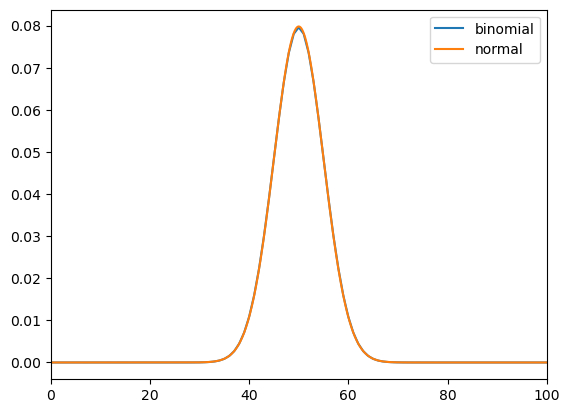

In [8]:
n = 100
p = 0.5
q = 1 - p

# Create Binomial distribution
PXbinomial = []
for k in range(n + 1):
    probX = sps.comb(n, k) * p**k * q ** (n - k)
    PXbinomial.append(probX)

# Create Normal distribution
mu = n * p
sigma = np.sqrt(n * p * q)

X = np.arange(0, n, 0.01)
PXnormal = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(
    -((X - mu) ** 2) / (2 * sigma**2)
)

# Plot
plt.plot(PXbinomial, label="binomial")
plt.plot(X, PXnormal, label="normal")
plt.legend()
plt.xlim(0, n)
plt.show()

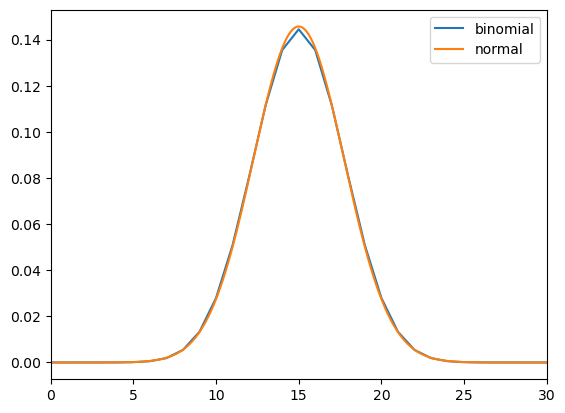

In [9]:
n = 30
p = 0.5
q = 1 - p

# Create Binomial distribution
PXbinomial = []
for k in range(n + 1):
    probX = sps.comb(n, k) * p**k * q ** (n - k)
    PXbinomial.append(probX)

# Create Normal distribution
mu = n * p
sigma = np.sqrt(n * p * q)

X = np.arange(0, n, 0.01)
PXnormal = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(
    -((X - mu) ** 2) / (2 * sigma**2)
)

# Plot
plt.plot(PXbinomial, label="binomial")
plt.plot(X, PXnormal, label="normal")
plt.legend()
plt.xlim(0, n)
plt.show()

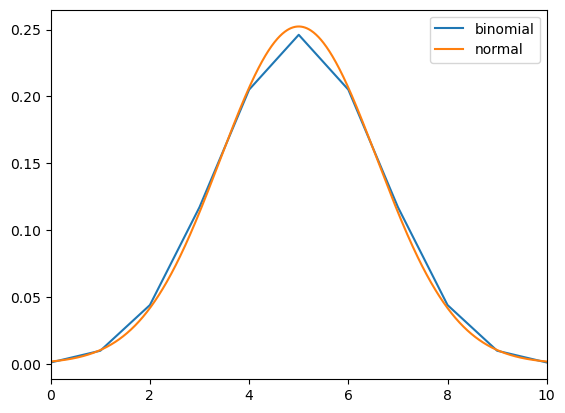

In [10]:
n = 10
p = 0.5
q = 1 - p

# Create Binomial distribution
PXbinomial = []
for k in range(n + 1):
    probX = sps.comb(n, k) * p**k * q ** (n - k)
    PXbinomial.append(probX)

# Create Normal distribution
mu = n * p
sigma = np.sqrt(n * p * q)

X = np.arange(0, n, 0.01)
PXnormal = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(
    -((X - mu) ** 2) / (2 * sigma**2)
)

# Plot
plt.plot(PXbinomial, label="binomial")
plt.plot(X, PXnormal, label="normal")
plt.legend()
plt.xlim(0, n)
plt.show()

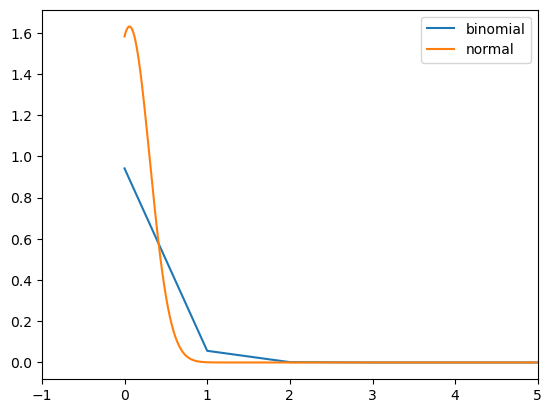

In [11]:
n = 30
p = 0.002
q = 1 - p

# Create Binomial distribution
PXbinomial = []
for k in range(n + 1):
    probX = sps.comb(n, k) * p**k * q ** (n - k)
    PXbinomial.append(probX)

# Create Normal distribution
mu = n * p
sigma = np.sqrt(n * p * q)

X = np.arange(0, n, 0.01)
PXnormal = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(
    -((X - mu) ** 2) / (2 * sigma**2)
)

# Plot
plt.plot(PXbinomial, label="binomial")
plt.plot(X, PXnormal, label="normal")
plt.legend()
plt.xlim(-1, +5)
plt.show()

# 16 The Standard Unit Normal and Probability Computations


<img src="./images/vid16-Normal01.jpg" 
        alt="standard normal distribution" 
            width="50%" height="50%">


The diagram illustrates concepts related to the 
**standard normal distribution** in statistics. 

This distribution is a bell-shaped curve with a mean of 0 and a 
standard deviation of 1.

**Key Elements on the diagram:**

1. **Standard Unit Normal ($\mu=0, \rho=1$):** This label indicates that 
the distribution being discussed is indeed the standard normal distribution. 

2. **PDF (Probability Density Function):** The top graph represents the 
PDF of the standard normal distribution. The vertical axis (labeled "f") 
represents the probability density, while the horizontal axis (labeled "x") 
represents the values of the random variable. 

3. **68%:** This label likely highlights the fact that approximately 
68% of the data in a normal distribution falls within one standard deviation 
of the mean. In the standard normal distribution, this corresponds to 
the interval between -1 and 1 on the x-axis.

4. **CDF (Cumulative Distribution Function):** The bottom graph represents the 
CDF of the standard normal distribution. The vertical axis (labeled "$\Phi$") 
represents the probability that a random variable takes on a value less 
than or equal to a given value on the horizontal axis (labeled "x").

5. **Integral Expression:** The equation 
6. $P(-1 \le x \le 1) = \int_{-1}^1 f(x) dx$ represents the probability of 
   a random variable falling within the interval between -1 and 1. 
   This probability is calculated by integrating the PDF 
   (f(x)) over that interval.

**Additional Notes:**

* The shaded area in the top graph likely represents the probability 
* of a random variable falling within one standard deviation of the mean 
* (i.e., between -1 and 1).
* The CDF graph shows the cumulative probability increasing from 0 to 1 
* as the value of x increases.


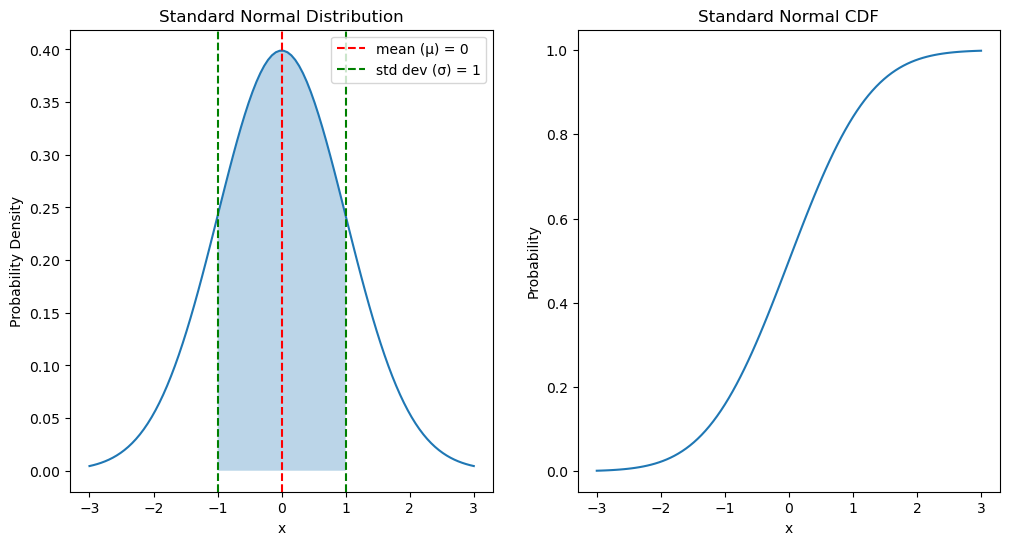

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm


def plot_standard_normal_distribution(ax):
    # Create a range of x values from -3 to 3
    """
    Plots the standard normal distribution (Gaussian distribution or bell curve)
    from -3 to 3.

    The plot shows the probability density function (PDF) of the standard
    normal distribution, which is a continuous probability distribution with
    a mean of 0 and a standard deviation of 1. The x-axis represents the
    values of the random variable, and the y-axis represents the
    corresponding probability densities.

    The plot also annotates the mean (μ) and standard deviation (σ) of the
    distribution with dashed red and green lines, respectively.

    The plot is displayed using matplotlib's pyplot interface.

    param ax: The axis object on which to plot the distribution.

    return: None
    """
    x = np.linspace(-3, 3, 100)

    # Calculate the corresponding y values using the standard normal
    # distribution formula
    y = norm.pdf(x)

    # Create the plot
    ax.plot(x, y)

    # Add title and labels
    ax.set_title("Standard Normal Distribution")
    ax.set_xlabel("x")
    ax.set_ylabel("Probability Density")

    # Fill the area from -1 to 1
    ax.fill_between(x, y, where=(x >= -1) & (x <= 1), alpha=0.3)

    # Annotate the mean (μ) and standard deviation (σ)
    mu = 0
    sigma = 1
    ax.axvline(x=mu, color="red", linestyle="--", label=f"mean (μ) = {mu}")
    ax.axvline(
        x=mu + sigma, color="green", linestyle="--", label=f"std dev (σ) = {sigma}"
    )
    ax.axvline(x=mu - sigma, color="green", linestyle="--")

    # Add legend
    ax.legend()


def plot_standard_cdf_normal_distribution(ax):
    """
    Plots the cumulative distribution function (CDF) of the standard
    normal distribution from -3 to 3.

    The plot shows the cumulative probability that a standard normal
    random variable is less than or equal to a given value on the x-axis.
    The y-axis represents the cumulative probability values.

    The plot is displayed using matplotlib's pyplot interface.

    param ax: The axis object on which to plot the CDF.

    return: None

    """

    x = np.linspace(-3, 3, 100)

    # Calculate the corresponding y values using the standard normal
    # distribution formula
    y = norm.cdf(x)

    # Create the plot
    ax.plot(x, y)

    # Add title and labels
    ax.set_title("Standard Normal CDF")
    ax.set_xlabel("x")
    ax.set_ylabel("Probability")


def plot_standard_normal_cdf():
    # Create a range of x values from -3 to 3
    """
    Plots the standard normal distribution and its cumulative distribution
    function (CDF) from -3 to 3.

    The plot on the left shows the probability density function (PDF) of the
    standard normal distribution, which is a continuous probability
    distribution with a mean of 0 and a standard deviation of 1. The x-axis
    represents the values of the random variable, and the y-axis represents the
    corresponding probability densities.

    The plot on the right shows the cumulative distribution function (CDF) of
    the standard normal distribution, which gives the cumulative probability
    that a standard normal random variable is less than or equal to a given
    value on the x-axis. The y-axis represents the cumulative probability
    values.

    The plot is displayed using matplotlib's pyplot interface.

    return: None
    """
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    plot_standard_normal_distribution(ax1)
    plot_standard_cdf_normal_distribution(ax2)

    # Display the plot
    plt.show()


# Call the function to plot the standard normal CDF
plot_standard_normal_cdf()

## $\Phi$ function

The Phi function ($\Phi$) in the context of statistics and probability 
refers to the **cumulative distribution function (CDF)** of the **standard normal distribution**. 

**Here's what it represents:**

* **$\Phi(z)$:**  For any given value of z, $\Phi(z)$ gives you the probability 
that a random variable from a standard normal distribution will take on 
a value **less than or equal to** $z$.

**In simpler terms:**

Imagine you have a bell-shaped curve representing the standard normal 
distribution. The $\Phi$ function tells you the area under the curve to 
the left of a specific point ($z$) on the x-axis.

**Key points to remember:**

* **Standard Normal Distribution:** The standard normal distribution has a 
mean of 0 and a standard deviation of 1.
* **Cumulative Probability:** The $\Phi$ function calculates the 
cumulative probability, meaning it adds up the probabilities of all values 
less than or equal to the given z-value.

**Example:**

If $\Phi(1.5) = 0.9332$, it means that there is a $93.32\%$ probability 
that a random variable from a standard normal distribution will take on a 
value less than or equal to $1.5$.

**How to find $\Phi(z)$:**

* **Standard Normal Tables:** You can find values of $\Phi(z) in 
standard normal distribution tables (also known as z-tables). 
These tables typically list values of $z$ and their corresponding 
$\Phi(z)$ values.
* **Statistical Software:** Many statistical software packages 
(like R, Python with libraries like SciPy, or Excel) have built-in 
functions to calculate $\Phi(z)$.

## Coin flips

Show concept of approximating a binomial distribution with a normal 
distribution using the **central limit theorem**.

**Key Elements on the Board:**

1. **Coin Flip Experiment:**
   - **Flip a coin $400$ times ($p = \frac{1}{2}$):** This indicates that 
  a fair coin is flipped $400$ times, with the probability of getting 
  heads ($p$) being $ 0.5$.
   - **#heads = $X \sim \operatorname {binomial}(400, \frac{1}{2})$:** 
  This defines the random variable $X$ as the number of heads obtained 
  in the $400$ flips. $X$ follows a binomial distribution with parameters 
  $n = 400$ (number of trials) and $p = 0.5$ (probability of success).

1. **Probability Calculation:**
   - **$P($190$ \le X \le 230)$:** This represents the probability of getting 
  between $190$ and $230$ heads in the 400 flips.

1. **Exact Calculation (Binomial):**
   - The equation $P(X = 190) + P(X = 191) + ... + P(X = 229) + P(X = 230)$ 
  shows the exact way to calculate the probability. It involves summing 
  the probabilities of getting exactly 190 heads, 191 heads, and so on, 
  up to 230 heads. This calculation can be quite tedious.

1. **Normal Approximation:**
   - **$X \sim \operatorname{normal}(200, 100)$:** This states that the 
  binomial distribution of $X$ can be approximated by a normal distribution 
  with a mean ($\mu$) of $200$ and a standard deviation (\rho) of $10$. 
  The mean is calculated as $\rho = n \times p = 400 \times 0.5 = 200$, 
  and the standard deviation is calculated as $\rho = \sqrt{n \times p \times (1 - p)} 
  = \sqrt{400 \times 0.5 \times 0.5} = 10$.
   - **$85\%$:** This likely represents the approximate probability of 
  getting between $190$ and $230$ heads using the normal approximation. 
  The result is a bell-shaped curve (normal distribution) with the shaded 
  area between $190$ and $230$ representing the estimated probability of $85\%$.

**Explanation of the Approximation:**

The central limit theorem states that as the number of trials in a 
binomial experiment increases, the distribution of the number of successes 
(X) approaches a normal distribution. In this case, with 400 flips, 
the approximation is likely to be quite accurate.

**Key Points:**

* The diagram demonstrates how the normal distribution can be used to approximate the binomial distribution in certain cases.
* This approximation can simplify calculations and provide insights into the behavior of the binomial distribution.

Let me know if you have any further questions or would like a deeper dive into any specific aspect!


In [13]:
def calculate_probability(n, p, lower, upper):
    """
    Calculate the probability of getting a certain number of successes
    in `n` independent trials, each with probability of success `p`.

    Parameters
    ----------
    n : int
        The number of independent trials.
    p : float
        The probability of success in each trial.
    lower : int
        The lower bound of the range of interest.
    upper : int
        The upper bound of the range of interest.

    Returns
    -------
    float
        The probability of getting between `lower_bound` and `upper_bound`
        successes in the `n` trials.

    Notes
    -----
    This function uses the normal distribution to approximate the
    probability. The approximation is close for large `n` and `p` not
    close to 0 or 1.
    """
    mean = n * p  # mean of the normal distribution
    std_dev = np.sqrt(n * p * (1 - p))  # standard deviation of the normal distribution

    # Define the range of interest
    # Standardize the bounds
    lower_bound_std = (lower - mean) / std_dev
    upper_bound_std = (upper - mean) / std_dev

    # Calculate the probability using the normal distribution
    return norm.cdf(upper_bound_std) - norm.cdf(lower_bound_std)


trials = 400
success = 0.5
lower_bound = 190
upper_bound = 230
probability = calculate_probability(trials, success, lower_bound, upper_bound)

print(
    f"The probability of getting between {lower_bound} and {upper_bound} "
    f"heads is approximately {probability:.4f}"
)

The probability of getting between 190 and 230 heads is approximately 0.8400


# 17 The Poisson Distribution and Limit of a Binomial Distribution

Certainly, let's break down how the binomial theorem can fail when a
pproximated by a normal distribution for small values of $p$.

**The Binomial Theorem and Normal Approximation**

* **Binomial Distribution:** The binomial distribution models the 
* probability of observing a certain number of successes in a fixed 
* number of independent trials, where each trial has only two possible 
* outcomes (success or failure) with a constant probability of success.
* **Normal Approximation:** When the sample size ($n$) is large and the 
* product `npq` is not too small, the binomial distribution can be 
* approximated by a normal distribution. This approximation is often 
* used to simplify calculations for large sample sizes.

**When the Approximation Fails for Small $p$**

The issue arises when the probability of success ($p$) is very small. 
In such cases, the binomial distribution can be skewed, especially when 
the sample size is not extremely large. The normal distribution, 
being symmetrical, may not accurately capture this skewness.

**Why Skewness Matters**

* **Tail Probabilities:** The binomial distribution, particularly when 
  $p$ is small, has a longer tail on the right side. This means there's 
  a higher probability of observing a few more successes than expected. 
  The normal approximation, being symmetrical, 
  may underestimate these tail probabilities.
* **Accuracy of Approximation:** The accuracy of the normal approximation 
  depends on how closely the binomial distribution resembles a bell-shaped 
  curve. For small $p$, the resemblance can be poor, leading to 
  inaccurate results.

**Visualizing the Issue**

Imagine a binomial distribution with a small $p$. It will likely be skewed 
to the right. If you overlay a normal distribution with the same mean 
and standard deviation, you'll notice that the normal distribution 
doesn't perfectly match the shape of the binomial distribution, 
especially in the tails. This mismatch can lead to errors in the approximation.

**Example:**

Let's say you're modelling the probability of a rare disease occurring 
in a population. If the disease is very rare (small $p$), 
the binomial distribution will be skewed. Using a normal approximation 
might underestimate the probability of observing a few more cases than expected.

**In Summary**

The normal approximation for the binomial distribution works best when 
the sample size is large and the probability of success ($p$) is not too 
small or too large (close to 1). When $p$ is very small, 
the binomial distribution can be skewed, and the normal approximation 
may not be accurate, especially for estimating tail probabilities.

## Poisson Approximation to the Binomial Distribution

![Poisson approximation to the binomial distribution](./images/Poisson01.jpg "Poisson approximation to the binomial distribution")

The diagram demonstrates the derivation of the Poisson distribution from 
the binomial distribution. Here's a step-by-step explanation:

1. **Binomial Distribution:**
   - We start with the probability mass function (PMF) of the 
  binomial distribution, which represents the probability of getting 
  exactly $k$ successes in $n$ independent trials, each with a 
  probability of success $p$.

1. **Substitution:**
   - The diagram introduces a new variable $\lambda = n p$. This substitution is crucial for the derivation.

2. **Rewriting the Binomial PMF:**
   - The binomial PMF is then rewritten using the substitution $\lambda = n p$. 
  This involves replacing $p$ with $\frac{\lambda}{n}$ in the expression.

1. **Limit as n Approaches Infinity:**
   - The key step is taking the limit of the rewritten PMF as the 
 number of trials ($n$) approaches infinity. This is where the Poisson 
 distribution emerges.

2. **Poisson Distribution:**
   - After applying the limit and simplifying the expression, we arrive at 
  the PMF of the Poisson distribution. This distribution models the 
  probability of a given number of events occurring within a 
  fixed interval of time or space, given that these events occur with a 
  known average rate and independently of the time since the last event.

**Poisson Distribution as an Approximation to Binomial**

The Poisson distribution can be used as an approximation to the binomial 
distribution under certain conditions:

1. **Large Number of Trials:** The number of trials ($n$) should be large.
2. **Small Probability of Success:** The probability of success in each 
   trial ($p$) should be small.
3. **$\lambda$ (Mean) Remains Constant:** While $n$ increases and $p$ 
   decreases, the product $n p$ (which is the mean of the binomial distribution) 
   should remain constant. This constant value is represented by $\lambda$ 
   and is often referred to as the mean rate in the Poisson distribution.

**Why the Approximation Works**

When these conditions are met, the binomial distribution starts to resemble 
the Poisson distribution. The large number of trials with a small probability 
of success in each trial creates a scenario where the events become rare 
but still occur with a certain average rate. This is precisely what the 
Poisson distribution models.

**In Summary**

The diagram demonstrates the mathematical derivation of the Poisson 
distribution from the binomial distribution. The Poisson distribution can 
be used as an approximation to the binomial distribution when the number 
of trials is large, the probability of success is small, 
and the mean remains constant. This approximation simplifies calculations 
and provides a useful tool for modelling rare events.


# 18 Geometric Distribution

* The Geometric distribution is a discrete probability distribution. 
* It models the number of **independent** trials needed to achieve the 
  **first success** in a sequence of experiments, where each experiment 
  has only two possible outcomes: success or failure.
* Key assumptions:
    * **Independence:** The outcome of each trial does not affect the 
  outcomes of subsequent trials.
    * **Constant Probability:** The probability of success (denoted by $p$) 
  remains the same for every trial.

**Example:**

* **Flipping a Coin:** Imagine you're flipping a fair coin repeatedly 
  until you get heads. 
    * Each flip is a trial.
    * Getting heads is a success ($p = 0.5$).
    * The Geometric distribution would help you calculate the 
  probability of getting heads on the first flip, the second flip, 
  the third flip, and so on.

**Key Formula:**

* **P $(X = x) = (1 - p)^{x-1} \times p$ ** 
    * Where:
        * $X$: The number of trials until the first success
        * $x$: The specific number of trials you're interested in
        * $p$: The probability of success in a single trial

**In simpler terms:**

* The formula calculates the probability of getting $x-1$ consecutive 
  failures followed by one success.

**Example Calculation:**

* Let's say you want to find the probability of getting heads for the 
  first time on the third coin flip:
    * $p = 0.5$ (probability of heads)
    * $x = 3$ (number of trials)
    * $P(X = 3) = (1 - 0.5)^{3-1} \times 0.5 = 0.25 \times 0.5 = 0.125$

**Key Properties:**

* **Memoryless:** The past history of trials has no impact on the 
  probability of success in future trials.
* **Mean (Expected Value):** $\frac{1}{p}$ 
* **Variance:** $\frac{1-p}{p^2}$

**Applications:**

* **Quality Control:** Determining the number of items to inspect 
  before finding a defective one.
* **Waiting Times:** Modelling the time until a specific event occurs 
  (e.g., waiting for a bus).
* **Sports:** Calculating the probability of a player scoring their 
  first goal in a game.

## Example Waiting time for a bus

**Modelling Bus Waiting Times with the Geometric Distribution**

While the exact distribution of bus waiting times is often more 
complex, we can use the Geometric distribution as a simplified model 
under certain assumptions.

**Key Assumptions:**

* **Regular Bus Intervals:** Let's assume buses arrive at a bus stop at 
  perfectly regular intervals (e.g., every 10 minutes).
* **Random Arrival:** You arrive at the bus stop at a completely random 
  time within any given interval.

**How the Geometric Distribution Applies:**

1. **Define "Success":** 
   - Consider each bus interval as a "trial."
   - "Success" in this case is arriving at the bus stop within a specific 
  time window after a bus has departed. 

1. **Probability of Success:**
   - If buses arrive every 10 minutes, and you consider arriving within 
  the first 2 minutes after a bus departs as "success," then the probability 
  of success $p$ would be $\frac{2}{10} = 0.2$.

1. **Waiting Time:**
   - The number of "trials" (bus intervals) you "wait" until you achieve 
  "success" represents your waiting time.

**Example:**

* **Waiting for 1 Interval:** The probability of arriving within the first 
  2 minutes of an interval (your first "trial") is $0.2$.
* **Waiting for 2 Intervals:** The probability of missing the first interval 
$0.8$ and then arriving within the first 2 minutes of the second interval 
$0.2$ is $0.8 \times 0.2 = 0.16$.
**Limitations:**

* **Real-world Complexity:** 
    - Bus schedules are often not perfectly regular.
    - Traffic, accidents, and other factors can cause significant delays.
    - Your arrival time might not be completely random.

**In Summary:**

While the Geometric distribution provides a simplified framework, 
it's essential to remember that real-world bus waiting times are 
influenced by many factors. More complex models, such as the 
**Exponential distribution**, are often used for a more accurate representation.

**Key Takeaway:**

The Geometric distribution can be a useful tool for understanding basic 
concepts of waiting times and how probabilities can be applied to 
real-world scenarios, even if the model itself might not perfectly 
capture the intricacies of a specific situation like bus arrivals.

## Example scoring a penalty

**Example: Scoring a Goal in a Penalty Shootout**

* **Scenario:** A soccer player is taking penalty kicks in a shootout. 
* **Assumptions:** 
    * The player has a consistent scoring probability of $0.8$ ($80\%$) 
  on each penalty kick.
    * Each penalty kick is an independent event 
      * the outcome of one kick doesn't affect the next.

* **Calculation:**

    * **Probability of scoring on the first attempt:** 
        * This is simply the player's success rate: $0.8$ or $80\%$

    * **Probability of scoring on the second attempt:**
        * This means missing the first attempt (0.2) and then scoring 
  the second ($0.8$): 
            * $0.2  \times 0.8 = 0.16$ or $16\%$

    * **Probability of scoring on the third attempt:** 
        * Miss the first, miss the second, then score the third: 
            * $0.2  \times 0.2  \times 0.8 = 0.032$ or $3.2\%$ 

* **Geometric Distribution:**

    * This scenario perfectly fits the Geometric distribution. 
    * 'Success' is scoring a goal. 
    * 'Failure' is missing a goal. 
    * We're interested in the number of attempts (trials) needed to 
  achieve the first success.

# 19 The Exponential Distribution: Time Between Poisson Events

![Exponential distribution](./images/Exponential_dist01.jpg "Exponential distribution")


The image presents information about the exponential distribution, a 
probability distribution often used to model the time between events 
in a Poisson process. 

A Poisson process is a stochastic process where events occur at a 
constant average rate and independently of the time since the last event.

**Key Points from the Image:**

* **Probability Density Function (PDF):** The PDF of the exponential 
distribution is given as:

\begin{align*} 
   P(T=t) = 
   \begin{cases} 
        \lambda e^{-\lambda t}  &\text{for } t \geq 0 \\ 
                          0 &\text{for }     t \lt 0 
    \end{cases}
\end{align*}

   where:
   - $T$ is the random variable representing the time between events.
   - $\lambda$ is the rate parameter, representing the average number of 
 - events per unit time.

* **Cumulative Distribution Function (CDF):** The CDF, denoted as $F(t)$, 
  is the probability that the time between events is less than or equal 
  to $T$. The image shows the CDF as:

\begin{align*} 
    F(t) = 1 - e^{-\lambda t}
\end{align*}

* **Applications:** The image mentions that the exponential distribution 
is suitable for modeling various real-world phenomena, such as:
   - Lifespans of electronic components or mechanical systems
   - Time between arrivals of customers at a service counter
   - Time between radioactive decays

**Exponential Distribution in Detail**

* **Definition:** The exponential distribution is a continuous probability 
distribution that describes the time between events in a Poisson process. 
It is characterized by a single parameter, $\lambda$, which represents 
the rate of events.
* **Key Properties:**
   - **Memorylessness:** One of the distinctive properties of the 
  exponential distribution is its memorylessness.
  * This means that the probability of an event occurring in the future 
  is independent of how long it has been since the last event.
   - **Relationship to Poisson Process:** 
     - The exponential distribution is closely related to the Poisson process. 
       - If the number of events occurring in a given interval follows 
         the exponential distribution, it is said to be a Poisson process. 
       - If the time between events in a Poisson distribution, then the time 
         between successive events follows an exponential distribution.
   - **Applications:** As mentioned earlier, the exponential distribution 
  has numerous applications in various fields, including 
    * reliability engineering, 
    * queuing theory, and 
    * finance.

**In Summary**

The image provides a concise overview of the exponential distribution, 
highlighting its PDF, CDF, and common applications. The exponential 
distribution is a valuable tool for modeling a wide range of phenomena 
involving the time between events in a Poisson process.

## Difference between Poisson and Exponential Distribution

While both the exponential and Poisson distributions are related to the 
concept of rare events, they model different aspects of these events:

**Poisson Distribution**

* **Focus:** The Poisson distribution models the **number of events** 
  occurring within a fixed interval of time or space.
* **Assumptions:**
    * Events occur at a constant average rate.
    * Events occur independently of the time since the last event.
* **Example:** The number of customers arriving at a store in an hour, 
  the number of cars passing a certain point on a highway in a minute, 
  or the number of typos on a page of a book.

**Exponential Distribution**

* **Focus:** The exponential distribution models the **time between events** 
  occurring in a Poisson process.
* **Assumptions:**
    * Events occur at a constant average rate.
    * Events occur independently of the time since the last event.
* **Example:** The time between customer arrivals at a store, the time 
  between cars passing a certain point on a highway, or the time until 
  a radioactive atom decays.

**Key Differences**

| Feature              | Poisson Distribution                 | Exponential Distribution                                           |
|----------------------|--------------------------------------|--------------------------------------------------------------------|
| **Type of Variable** | Discrete (counts)                    | Continuous (time or distance)                                      |
| **What it Models**   | Number of events in a fixed interval | Time between events                                                |
| **Parameter**        | $\lambda$ (average rate of events)   | $\lambda$ (same rate parameter as Poisson)                         |
| **Memorylessness**   | Not applicable                       | Exhibits memorylessness (the past doesn't influence future events) |

**Relationship**

The two distributions are closely related. If the number of events occurring 
in a given interval follows a Poisson distribution, then the time between 
successive events follows an exponential distribution with the same rate 
parameter ($\lambda$).

**In Summary**

* The Poisson distribution deals with the count of events, 
* The exponential distribution deals with the time between events. 

Both are essential tools for understanding and modelling various phenomena 
involving rare events occurring at a constant rate.

## Exercise

The exercise has two parts:

1. **Derive the CDF (Cumulative Distribution Function)**

   - The prompt asks you to find the CDF, denoted as $F(t)$, for the 
  exponential distribution. 

   - Recall that the CDF is the probability that the random variable 
  (in this case, the time between events) is less than or equal to a 
  certain value (`t`). 

   - Mathematically, it's represented as:
\begin{align*} 
    F(t) = P(T \leq t) = \int_{-\infty}^{t} f(\tau) d\tau
\end{align*}
where $f(\tau)$ is the probability density function (PDF) of the 
exponential distribution.

1. **Verify that $F(t)$ is a PDF**

   - To verify that $F(t)$ is a valid CDF, you need to show that it 
   - satisfies the following properties:

     - **Non-negativity:** $F(t) \ge 0$ for all values of `t`.
     - **Monotonicity:** $F(t)$ is a non-decreasing function. 
  That is, if $t_1 < t_2$, then $F(t_1) ≤ F(t_2)$.
     - **Limiting Behavior:** 
        - $\underset{t → -\infty}{\lim} F(t) = 0$
        - $\underset{t → \infty}{\lim} F(t) = 1$



In [14]:
lamda = sp.symbols('lamda', positive=True)
assert exponential_distribution_cdf(sp.oo, lamda) == 1
assert exponential_distribution_cdf(-sp.oo, lamda) == 0

# 20 The Hazard Rate and Memoryless Property

The Hazard Rate and Memoryless Property of the Exponential Distribution

This section explores the memoryless property and hazard rate in the 
context of an exponential distribution.

**Memoryless Property**

* **Concept:** The memoryless property states that the future behavior 
  of a system does not depend on its past history. In the context of 
  an exponential distribution, it means that the probability of an event 
  happening in the next time interval is independent of how long the 
  system has already been in operation.

* **Mathematical Definition:**

  If $T$ is a random variable following an exponential distribution 
  with parameter $\lambda$, then the memoryless property is expressed as:

  $$P(T \gt t + s | T \gt s) = P(T \gt t)$$

  This means that the probability of the system surviving for an 
  additional time $t$ given that it has already survived for time $s$, 
  where $s$ is equal to the probability of the system surviving for 
  time $t$ from the very beginning.

**Hazard Rate**

* **Concept:** The hazard rate, also known as the **instantaneous** 
  failure rate, represents the probability of an event happening in 
  the next infinitesimal time interval, given that the system has 
  survived up to that point. 

* **Mathematical Definition:**

  For a continuous random variable $T$, the hazard rate $h(t)$ is defined as:

  $$h(t) = \underset{dt -\gt 0}{\lim } \frac{P(t \lt T \le t + dt | T \gt t)} { dt} $$

  This essentially calculates the probability of the event happening 
  in a very small time interval $d t$ at time $t$, given that the event 
  has not happened until time $t$.

**Derivation of Hazard Rate for Exponential Distribution**

1. **Probability of Survival:** The probability of the system surviving 
   beyond time $t$ in an exponential distribution is given by:

   $$P(T \gt t) = e^{-\lambda t}$$

2. **Probability of Failure in Next Interval:** The probability of the 
   event happening in the next infinitesimal time interval $d t$ is:

   $$P(t \lt T \le t + dt) = P(T \gt t) - P(T \gt t + dt)$$

   $$P(t \lt T \le t + dt) = e^{-\lambda t} - e^{-\lambda (t + dt)}$$

3. **Conditional Probability:** The probability of the event happening 
   in the next interval given that it has not happened until time $t$ is:

   $$P(t \lt T \le t + dt | T \gt t) =\frac{P(t \lt T \le t + dt)}{ P(T \gt t)}$$

   $$P(t \lt T \le t + dt | T \gt t) = \frac {e^{-\lambda t} - e^{-\lambda  (t + dt)}} {e^{-\lambda t}}$$

4. **Simplifying the Expression:**

   $$P(t \lt T \le t + dt | T \gt t) = 1 - e^{-\lambda dt}$$

   Using the Taylor series expansion for $e^{-\lambda dt}$:

   $$P(t \lt T \le t + dt | T \gt t) ≈ 1 - (1 - \lambda dt) = \lambda dt$$

5. **Calculating the Hazard Rate:**

   $$h(t) = \underset{dt \to 0}{\lim} \frac{P(t \lt T \le t + dt | T \gt t)}{dt}$$
   $$h(t) = \underset{dt \to 0}{\lim} \frac{\lambda dt}{dt}$$

   $$h(t) = \lambda $$

Therefore, the hazard rate for an exponential distribution is constant 
and equal to the rate parameter $\lambda$ 

**In Summary**

The memoryless property and the derivation of the 
hazard rate for an exponential distribution. The memoryless property 
implies that the future behavior of the system is independent of its 
past, and the hazard rate is constant and equal to the rate parameter. 


# 21 Connection Between Exponential and Poisson Distributions

The exponential and Poisson distributions are closely related, 
both describing events that occur randomly over time. 
Here's the key connection:

**1. Poisson Distribution:**

* **Models:** The number of events occurring in a fixed interval of time, 
  given a constant average rate of occurrence ($\lambda$).
  * The number of customers arriving at a store per hour.

**2. Exponential Distribution:**

* **Models:** The time between successive events in a Poisson process.
  * The time between the arrival of two consecutive customers at a store.

**Key Relationship:**

* If the number of events occurring in a fixed time interval follows a 
  Poisson distribution with rate $\lambda$, then the time between 
  successive events follows an exponential distribution with the 
  same rate parameter $\lambda$.

**In simpler terms:**

* If you know the average rate of events (Poisson), you can predict how 
  long you'll wait for the next event (Exponential).
* If you know the average time between events (Exponential), you can 
  predict how many events will occur in a given time (Poisson).

## Example

* **Poisson:** If customers arrive at a store at an average rate of 
  $5$ customers per hour ($\lambda = 5$), then the number of customers 
  arriving in any given hour follows a Poisson distribution.
* **Exponential:** The time between the arrival of two consecutive 
  customers will follow an exponential distribution with the same 
  rate parameter $\lambda = 5.$

**In essence:**

* The Poisson distribution focuses on the *number* of events in a given time.
* The exponential distribution focuses on the *time* between events.

These two distributions are fundamental in 
* queuing theory, 
* reliability analysis, and 
* other areas of applied probability and statistics.

## Poisson Process

A Poisson Process is a stochastic (random) process that describes 
the arrivals of events over time. Here are the key characteristics:

1. **Events are Random and Independent:** 
   - The occurrence of one event does not influence the probability 
  of another event occurring. They are independent of each other. 

1. **Constant Rate:** 
   - The average rate at which events occur remains constant over time. 
  This rate is typically denoted by the symbol $\lambda $.

1. **Infinitesimal Intervals:** 
   - In any very small time interval (infinitesimal), the probability 
  of a single event occurring is proportional to the length of the interval. 

**Key Properties of a Poisson Process:**

* **Number of Events:** The number of events occurring in a fixed time 
  interval follows a Poisson distribution with parameter $\lambda t$, 
  where $\lambda $ is the rate of events and $t$ is the time interval.

* **Waiting Times:** The time between successive events follows an 
  exponential distribution with the same rate parameter $\lambda $.

**Examples of Poisson Processes:**

  * **Radioactive Decay:** The number of radioactive particles emitted 
  from a source in a given time.
  * **Customer Arrivals:** The number of customers arriving at a store 
  in a given hour.
  * **Telephone Calls:** The number of phone calls received at a call 
  center in a given minute.
  * **Website Hits:** The number of visitors arriving on a website 
  in a given second.

**In essence:**

A Poisson Process is a mathematical model that helps us understand 
and predict the behaviour of random events that occur continuously 
over time at a constant average rate. 

# 21-A Connection Between Exponential and Poisson Distributions

## Poisson Distribution
- **Purpose**: Models the number of events occurring within a fixed 
  interval of time or space.
  - **Example**: Number of emails received in an hour.
- **Parameter**: $\lambda$ , the average rate of events per interval.
- **Probability Mass Function (PMF)**:
  $$
  P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!}
  $$
  where $ k $ is the number of events.

## Exponential Distribution
- **Purpose**: Models the time between consecutive events in a Poisson process.
  - **Example**: Time between receiving two consecutive emails.
- **Parameter**: $\lambda$ , the rate parameter (same as in Poisson distribution).
- **Probability Density Function (PDF)**:
  $$
  f(t) = \lambda e^{-\lambda t}
  $$
  where $ t $ is the time between events.

### Key Differences
1. **Type of Data**:
   - Poisson: Discrete (number of events).
   - Exponential: Continuous (time between events).

2. **Usage**:
   - Poisson: Counts the number of events in a fixed interval.
   - Exponential: Measures the time between events.

3. **Relationship**:
   - The Exponential distribution describes the time between events in a 
  Poisson process. If events follow a Poisson distribution with rate 
  $\lambda$, the time between events follows an Exponential distribution 
  with the same rate $\lambda$.

## Poisson Process

A Poisson process is a mathematical model used to describe events that 
occur randomly over time or space. It's named after the French 
mathematician Siméon-Denis Poisson. 

Here are some key characteristics of a Poisson process:

1. **Events occur independently**: The occurrence of one event does not 
   affect the probability of another event occurring.
2. **Constant average rate**: Events happen at a constant average rate, 
   denoted by $\lambda$ , which is the average number of events per 
   unit time or space.
3. **No simultaneous events**: In a Poisson process, the probability of 
   two or more events occurring at the exact same time or location is zero.

## Examples of Poisson Processes
- **Arrival of customers** at a store.
- **Number of phone calls** received at a call center.
- **Occurrences of natural disasters** like earthquakes in a region.

The Poisson process is widely used in various fields such as 
* telecommunications, 
* finance, and 
* natural sciences 

to model random events and their distributions.
